### Creating Train & Test 

In [1]:
#Libraries that will be used by both fastText & XGBoost
import pandas as pd
import time
import sys
sys.path.append("..")
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/train/reuters_train_52/r52-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/test/reuters_test_52/r52-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
test.head()

,label,content
0,trade,asian exporters fear damage from u s japan rif...
1,grain,china daily says vermin eat pct grain stocks a...
2,ship,australian foreign ship ban ends but nsw ports...
3,gold,western mining to open new gold mine in austra...
4,acq,sumitomo bank aims at quick recovery from merg...


### fastText (lr=1.0)

In [3]:
#Importing Libs that are useul to fastText

import os
from FasttextClassifier.FasttextClassifier import FasttextClassifier
from sklearn.model_selection import train_test_split
import random
import csv
from pathlib import Path

#Creating column with the label in fastText format

test['label'] = '__label__'+test['label']
train['label'] = '__label__'+train['label']


#saving train file
train.to_csv('trainFT.txt', sep='\t', header=None, index=False)
test.to_csv('testFT.txt', sep='\t', header=None, index=False)


#Start time measurement
start_time = time.time()

#Create model and Test

ft_model = FasttextClassifier(train_data='trainFT.txt')
fastText_test=ft_model.fasttext_test('testFT.txt')
fastText_accuracy= fastText_test[1]
print (fastText_accuracy)
fastText_execution_time= (time.time() - start_time)
print("--- %s seconds ---" % fastText_execution_time)

0.9279595015576324
--- 3.3746941089630127 seconds ---


In [4]:
execTime_FT = []
accFT_lst = []
for epoch in range(1, 100):
    start_time = time.time()
    ft_model = FasttextClassifier(train_data='trainFT.txt', epoch=epoch)
    fastText_execution_time = (time.time() - start_time)
    execTime_FT.append(fastText_execution_time)
    fastText_test = ft_model.fasttext_test('testFT.txt')
    fastText_accuracy = fastText_test[1]
    accFT_lst.append(fastText_accuracy)
    print (fastText_accuracy)
    print("--- %s seconds ---" % fastText_execution_time)

0.7659657320872274
--- 0.23935914039611816 seconds ---
0.8411214953271028
--- 0.33809542655944824 seconds ---
0.8648753894080997
--- 0.4408226013183594 seconds ---
0.8812305295950156
--- 0.43984246253967285 seconds ---
0.8901869158878505
--- 0.6664650440216064 seconds ---
0.8979750778816199
--- 0.9397673606872559 seconds ---
0.9042056074766355
--- 1.0043120384216309 seconds ---
0.9123831775700935
--- 1.37831449508667 seconds ---
0.9182242990654206
--- 1.6581454277038574 seconds ---
0.9197819314641744
--- 2.4112446308135986 seconds ---
0.9221183800623053
--- 2.502437114715576 seconds ---
0.92601246105919
--- 2.0929720401763916 seconds ---
0.9295171339563862
--- 2.9762468338012695 seconds ---
0.926791277258567
--- 2.535064697265625 seconds ---
0.9291277258566978
--- 2.390639066696167 seconds ---
0.927570093457944
--- 2.4026596546173096 seconds ---
0.92601246105919
--- 2.3677427768707275 seconds ---
0.9287383177570093
--- 2.5698976516723633 seconds ---
0.9302959501557633
--- 2.81657505035

### fastText (lr=0.3)

In [15]:
fastText_test=ft_model.fasttext_test('testFT.txt')
execTime_FT03 = []
accFT_lst03 = []
for epoch in range(1, 100):
    start_time = time.time()
    ft_model = FasttextClassifier(train_data='trainFT.txt', epoch=epoch, lr=0.3)
    fastText_execution_time03 = (time.time() - start_time)
    execTime_FT03.append(fastText_execution_time03)
    fastText_test = ft_model.fasttext_test('testFT.txt')
    fastText_accuracy03 = fastText_test[1]
    accFT_lst03.append(fastText_accuracy03)
    print (fastText_accuracy03)
    print("--- %s seconds ---" % fastText_execution_time03)

0.6802959501557633
--- 0.2672858238220215 seconds ---
0.7219626168224299
--- 0.3510622978210449 seconds ---
0.7760903426791277
--- 0.46276307106018066 seconds ---
0.801791277258567
--- 0.4497988224029541 seconds ---
0.8181464174454829
--- 0.548534631729126 seconds ---
0.830607476635514
--- 0.652256965637207 seconds ---
0.8415109034267912
--- 0.6273224353790283 seconds ---
0.8457943925233645
--- 0.7480015754699707 seconds ---
0.8535825545171339
--- 0.738027811050415 seconds ---
0.8625389408099688
--- 0.870673418045044 seconds ---
0.866822429906542
--- 0.946469783782959 seconds ---
0.8711059190031153
--- 0.9464700222015381 seconds ---
0.8769470404984424
--- 1.0442094802856445 seconds ---
0.8812305295950156
--- 1.1389544010162354 seconds ---
0.8827881619937694
--- 1.258634090423584 seconds ---
0.8855140186915887
--- 1.3469643592834473 seconds ---
0.8882398753894081
--- 1.344404935836792 seconds ---
0.8913551401869159
--- 1.4491262435913086 seconds ---
0.8929127725856698
--- 1.543872356414

### XGBoost (lr=1.0)

In [6]:
#Importing Libs that are useul to XGBoost

import xgboost as xgb
from glove.glovevectorizer import GloveVectorizer
from sklearn.metrics import mean_squared_error, accuracy_score

In [7]:
#Load word vectors

vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content) # get wordvectors


Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 6532


In [8]:
#Start time measurement

start_time = time.time()

xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,  n_estimators=10)
trainLabelLst = list(dict.fromkeys(train.label))
def get_label(label_str_lst, label_lst):
    return_lst = []
    for s1 in label_str_lst:
        for i, label in enumerate(label_lst):
            if s1 == label:
                return_lst.append(i)
    return return_lst


# get label index

train['label_idx'] = get_label(train['label'],trainLabelLst)
Ytrain = train.label_idx

data_dmmatrix= xgb.DMatrix(data=Xtrain,label=Ytrain)
param = {
    'max_depth': 10,
    'eta': 1.0,
    'objective': 'multi:softmax',
    'num_class': 52} 
epochs = 1

model = xgb.train(param, data_dmmatrix, epochs)
Xtest = vectorizer.transform(test.content)
test['label_idx'] = get_label(test['label'],trainLabelLst)
Ytest = test.label_idx
xgb_test = xgb.DMatrix(Xtest, label=Ytest)
predictions = model.predict(xgb_test)
XGBoost_accuracy=accuracy_score(Ytest, predictions)
print(XGBoost_accuracy)
XGBoost_time= model.predict(xgb_test)
XGBoost_execution_time= (time.time() - start_time)
print("--- %s seconds ---" % XGBoost_execution_time)

Numer of samples with no words found: 0 / 2568
0.758177570093458
--- 1.1275358200073242 seconds ---


In [9]:
execTime_XG = []
accXG_lst = []
for epochs in range(1, 100):
    start_time = time.time()
    model = xgb.train(param, data_dmmatrix, epochs)
    XGBoost_execution_time = (time.time() - start_time)
    execTime_XG.append(XGBoost_execution_time)
    predictions = model.predict(xgb_test)
    XGBoost_accuracy = accuracy_score(Ytest, predictions)
    accXG_lst.append(XGBoost_accuracy)
    print(XGBoost_accuracy)
    print("--- %s seconds ---" % XGBoost_execution_time)

0.758177570093458
--- 0.6727073192596436 seconds ---
0.6534267912772586
--- 1.3195128440856934 seconds ---
0.7453271028037384
--- 1.4915552139282227 seconds ---
0.7492211838006231
--- 2.1353325843811035 seconds ---
0.7550623052959502
--- 2.6088318824768066 seconds ---
0.7562305295950156
--- 2.848738670349121 seconds ---
0.7585669781931464
--- 3.140679121017456 seconds ---
0.758177570093458
--- 3.2767980098724365 seconds ---
0.757398753894081
--- 3.8543601036071777 seconds ---
0.7609034267912772
--- 4.9513325691223145 seconds ---
0.7616822429906542
--- 4.117076873779297 seconds ---
0.7605140186915887
--- 4.038333177566528 seconds ---
0.7546728971962616
--- 4.451164722442627 seconds ---
0.758177570093458
--- 4.4023284912109375 seconds ---
0.7597352024922118
--- 4.529011011123657 seconds ---
0.7628504672897196
--- 5.202708721160889 seconds ---
0.7589563862928349
--- 5.285565614700317 seconds ---
0.7597352024922118
--- 5.178768634796143 seconds ---
0.7601246105919003
--- 5.257572174072266 

### XGBoost (lr=0.3)

In [10]:
xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,  n_estimators=10)
trainLabelLst = list(dict.fromkeys(train.label))
def get_label(label_str_lst, label_lst):
    return_lst = []
    for s1 in label_str_lst:
        for i, label in enumerate(label_lst):
            if s1 == label:
                return_lst.append(i)
    return return_lst


# get label index

train['label_idx'] = get_label(train['label'],trainLabelLst)
Ytrain = train.label_idx

data_dmmatrix= xgb.DMatrix(data=Xtrain,label=Ytrain)
param = {
    'max_depth': 10,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 52} 
epochs = 1

model = xgb.train(param, data_dmmatrix, epochs)
Xtest = vectorizer.transform(test.content)
test['label_idx'] = get_label(test['label'],trainLabelLst)
Ytest = test.label_idx
xgb_test = xgb.DMatrix(Xtest, label=Ytest)

execTime_XG_lr03 = []
accXG_lst_lr03 = []
for epochs in range(1, 100):
    start_time = time.time()
    model = xgb.train(param, data_dmmatrix, epochs)
    XGBoost_execution_time = (time.time() - start_time)
    execTime_XG_lr03.append(XGBoost_execution_time)
    predictions = model.predict(xgb_test)
    XGBoost_accuracy = accuracy_score(Ytest, predictions)
    accXG_lst_lr03.append(XGBoost_accuracy)
    print(XGBoost_accuracy)
    print("--- %s seconds ---" % XGBoost_execution_time)

Numer of samples with no words found: 0 / 2568
0.758177570093458
--- 0.7864296436309814 seconds ---
0.7655763239875389
--- 1.6481494903564453 seconds ---
0.7725856697819314
--- 1.8770346641540527 seconds ---
0.7834890965732088
--- 2.5312490463256836 seconds ---
0.7873831775700935
--- 2.724752187728882 seconds ---
0.7932242990654206
--- 3.16310453414917 seconds ---
0.7955607476635514
--- 3.6078298091888428 seconds ---
0.7986760124610592
--- 4.388386964797974 seconds ---
0.80101246105919
--- 4.6337220668792725 seconds ---
0.8029595015576324
--- 5.114933490753174 seconds ---
0.8052959501557633
--- 5.680429220199585 seconds ---
0.8041277258566978
--- 5.7216033935546875 seconds ---
0.8095794392523364
--- 6.317212343215942 seconds ---
0.8111370716510904
--- 7.004452705383301 seconds ---
0.8146417445482866
--- 6.940582752227783 seconds ---
0.8142523364485982
--- 7.66526198387146 seconds ---
0.8138629283489096
--- 8.162825345993042 seconds ---
0.8150311526479751
--- 8.611746311187744 seconds -

### Random Decision Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=None, verbose = 1)

train = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/train/reuters_train_52/r52-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/test/reuters_test_52/r52-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']

vectorizer = GloveVectorizer()

Xtrain = vectorizer.fit_transform(train.content)
Ytrain = train.label
Xtest = vectorizer.fit_transform(test.content)
Ytest = test.label
# create the model, train it, print scores
model = RandomForestClassifier(n_estimators=1)
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 6532
Numer of samples with no words found: 0 / 2568
train score: 0.887630128597673
test score: 0.7083333333333334


In [12]:
#Note: Number of estimators ≠ Number of epochs
execTime_RF = []
accRF_lst = []
for estimators in range(1, 100):
    start_time = time.time()
    model = RandomForestClassifier(n_estimators = estimators)
    model.fit(Xtrain, Ytrain)
    Random_Forest_execution_time = (time.time() - start_time)
    execTime_RF.append(Random_Forest_execution_time)
    Random_Forest_accuracy=model.score(Xtest, Ytest)
    accRF_lst.append(Random_Forest_accuracy)
    print(Random_Forest_accuracy)
    print("--- %s seconds ---" % Random_Forest_execution_time)

0.690809968847352
--- 0.07679367065429688 seconds ---
0.7328660436137072
--- 0.1466073989868164 seconds ---
0.7464953271028038
--- 0.2124319076538086 seconds ---
0.7535046728971962
--- 0.2622978687286377 seconds ---
0.7737538940809969
--- 0.3031890392303467 seconds ---
0.7924454828660437
--- 0.3949441909790039 seconds ---
0.7862149532710281
--- 0.45179176330566406 seconds ---
0.7916666666666666
--- 0.5076422691345215 seconds ---
0.7947819314641744
--- 0.5525221824645996 seconds ---
0.7994548286604362
--- 0.6901538372039795 seconds ---
0.8169781931464174
--- 0.6592366695404053 seconds ---
0.8130841121495327
--- 0.7559773921966553 seconds ---
0.8056853582554517
--- 0.8148214817047119 seconds ---
0.8111370716510904
--- 0.9045805931091309 seconds ---
0.8235981308411215
--- 0.9524531364440918 seconds ---
0.817367601246106
--- 1.0362293720245361 seconds ---
0.8212616822429907
--- 1.0860955715179443 seconds ---
0.8216510903426791
--- 1.1668791770935059 seconds ---
0.831386292834891
--- 1.2356

### Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


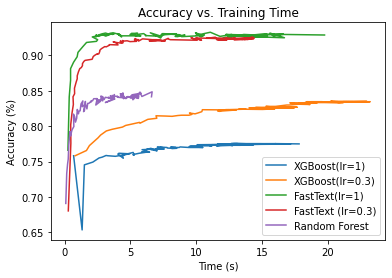

In [16]:
xg=plt.plot(execTime_XG, accXG_lst, label='XGBoost(lr=1)')
xg_lr03=plt.plot(execTime_XG_lr03, accXG_lst_lr03, label='XGBoost(lr=0.3)')
ftext=plt.plot(execTime_FT, accFT_lst, label= "FastText(lr=1)")
ftext03=plt.plot(execTime_FT03, accFT_lst03, label= "FastText (lr=0.3)")
rf=plt.plot(execTime_RF,accRF_lst, label='Random Forest')
plt.legend()
plt.ylabel("Accuracy (%)")
plt.xlabel("Time (s)")
plt.title("Accuracy vs. Training Time")
plt.savefig('C:/Users/franc/OneDrive/Documentos/Projects/r52/tclass/Data/train/reuters_train_52/accuracy_training.eps', format='eps')
plt.show()